# Capstone Project - Car accident severity

### Description of the Problem and Background

The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.

In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations.

Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.

The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

The data we have consists of includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.

### Description of the Data

We chose the unbalanced dataset provided by the Seattle Department of Transportation Traffic Management Division with 194673 rows (accidents) and 37 columns (features) where each accident is given a severity code. It covers accidents from January 2004 to May 2020. Some of the features in this dataset include and are not limited to Severity code, Location/Address of accident, Weather condition at the incident site, Driver state (whether under influence or not), collision type. Hence we think its a good generalized dataset which will help us in creating an accurate predictive model. The unbalance with respect to the severity code in the dataset is as follows.

SEVERITY CODE Count

1 — 136485

2 — 58188

Dependent variable/ target: “SEVERITYCODE” (0 to 2 levels) "SEVERITYDESC"

0 - Little to no Probability (Clear Weather Conditions)
1 - Very Low Probability - Chance or Property Damage 
2 - Low Probability - Chance of Injury 

## Methodology 

In [47]:
#Reading the Datset
import pandas as pd
data=pd.read_csv(r"Data-Collisions.csv")
data.head()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [48]:
#columns name
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [49]:
#Rows and Columns
data.shape

(194673, 38)

In [53]:
#Target variable
data["SEVERITYDESC"].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

#### Feature Selection

*Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model*

Here, In the Data, we are considering only few features.
They are  WEATHER,ROADCOND,JUNCTIONTYPE,VEHCOUNT,PERSONCOUNT,SEVERITYDESC,ADDRTYPE,SDOT_COLDESC,LIGHTCOND

/* Description of Variables*/

#SEVERITYDESC  :  A description of code that corresponds to the severity of the collision
#WEATHER       :  A description of the weather conditions during the time of the collision. 
#ROADCOND      :  The condition of the road during the collision.
#JUNCTIONTYPE  :  Category of junction at which collision took place 
#VEHCOUNT      :  The number of vehicles involved in the collision.This is entered by the state. 
#PERSONCOUNT   :  The total number of people involved in the collision
#ADDRTYPE      :  Collision address type-- Alley,Block,Intersection
#SDOT_COLDESC  :  A description of the collision corresponding to the collision code. 
#LIGHTCOND     :  The light conditions during the collision.

In [54]:
att=['WEATHER','ROADCOND','JUNCTIONTYPE','VEHCOUNT','PERSONCOUNT','SEVERITYDESC','ADDRTYPE', 'SDOT_COLDESC','LIGHTCOND']
att

['WEATHER',
 'ROADCOND',
 'JUNCTIONTYPE',
 'VEHCOUNT',
 'PERSONCOUNT',
 'SEVERITYDESC',
 'ADDRTYPE',
 'SDOT_COLDESC',
 'LIGHTCOND']

#### Data Wrangling

In [55]:
df=data[att]
df.head()

,WEATHER,ROADCOND,JUNCTIONTYPE,VEHCOUNT,PERSONCOUNT,SEVERITYDESC,ADDRTYPE,SDOT_COLDESC,LIGHTCOND
0,Overcast,Wet,At Intersection (intersection related),2,2,Injury Collision,Intersection,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight
1,Raining,Wet,Mid-Block (not related to intersection),2,2,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Dark - Street Lights On
2,Overcast,Dry,Mid-Block (not related to intersection),3,4,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Daylight
3,Clear,Dry,Mid-Block (not related to intersection),3,3,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight
4,Raining,Wet,At Intersection (intersection related),2,2,Injury Collision,Intersection,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight


In [56]:
#Checking the Value counts of all variables
for x in att:
    print(df[x].value_counts())
    print ('-'*80)

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
--------------------------------------------------------------------------------
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
--------------------------------------------------------------------------------
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 

In [57]:
#Checking The Null values
df.isnull().sum()

WEATHER         5081
ROADCOND        5012
JUNCTIONTYPE    6329
VEHCOUNT           0
PERSONCOUNT        0
SEVERITYDESC       0
ADDRTYPE        1926
SDOT_COLDESC       0
LIGHTCOND       5170
dtype: int64

In [58]:
#checking number of samples
df.shape

(194673, 9)

In [59]:
#Here the missing values values are less and total values are 194673.so we can drop them.
df=df.dropna()
df.shape

(182914, 9)

In [60]:
df.head()

,WEATHER,ROADCOND,JUNCTIONTYPE,VEHCOUNT,PERSONCOUNT,SEVERITYDESC,ADDRTYPE,SDOT_COLDESC,LIGHTCOND
0,Overcast,Wet,At Intersection (intersection related),2,2,Injury Collision,Intersection,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight
1,Raining,Wet,Mid-Block (not related to intersection),2,2,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Dark - Street Lights On
2,Overcast,Dry,Mid-Block (not related to intersection),3,4,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Daylight
3,Clear,Dry,Mid-Block (not related to intersection),3,3,Property Damage Only Collision,Block,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight
4,Raining,Wet,At Intersection (intersection related),2,2,Injury Collision,Intersection,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Daylight


In [61]:
#verifying  agian The Null values
df.isnull().sum()

WEATHER         0
ROADCOND        0
JUNCTIONTYPE    0
VEHCOUNT        0
PERSONCOUNT     0
SEVERITYDESC    0
ADDRTYPE        0
SDOT_COLDESC    0
LIGHTCOND       0
dtype: int64

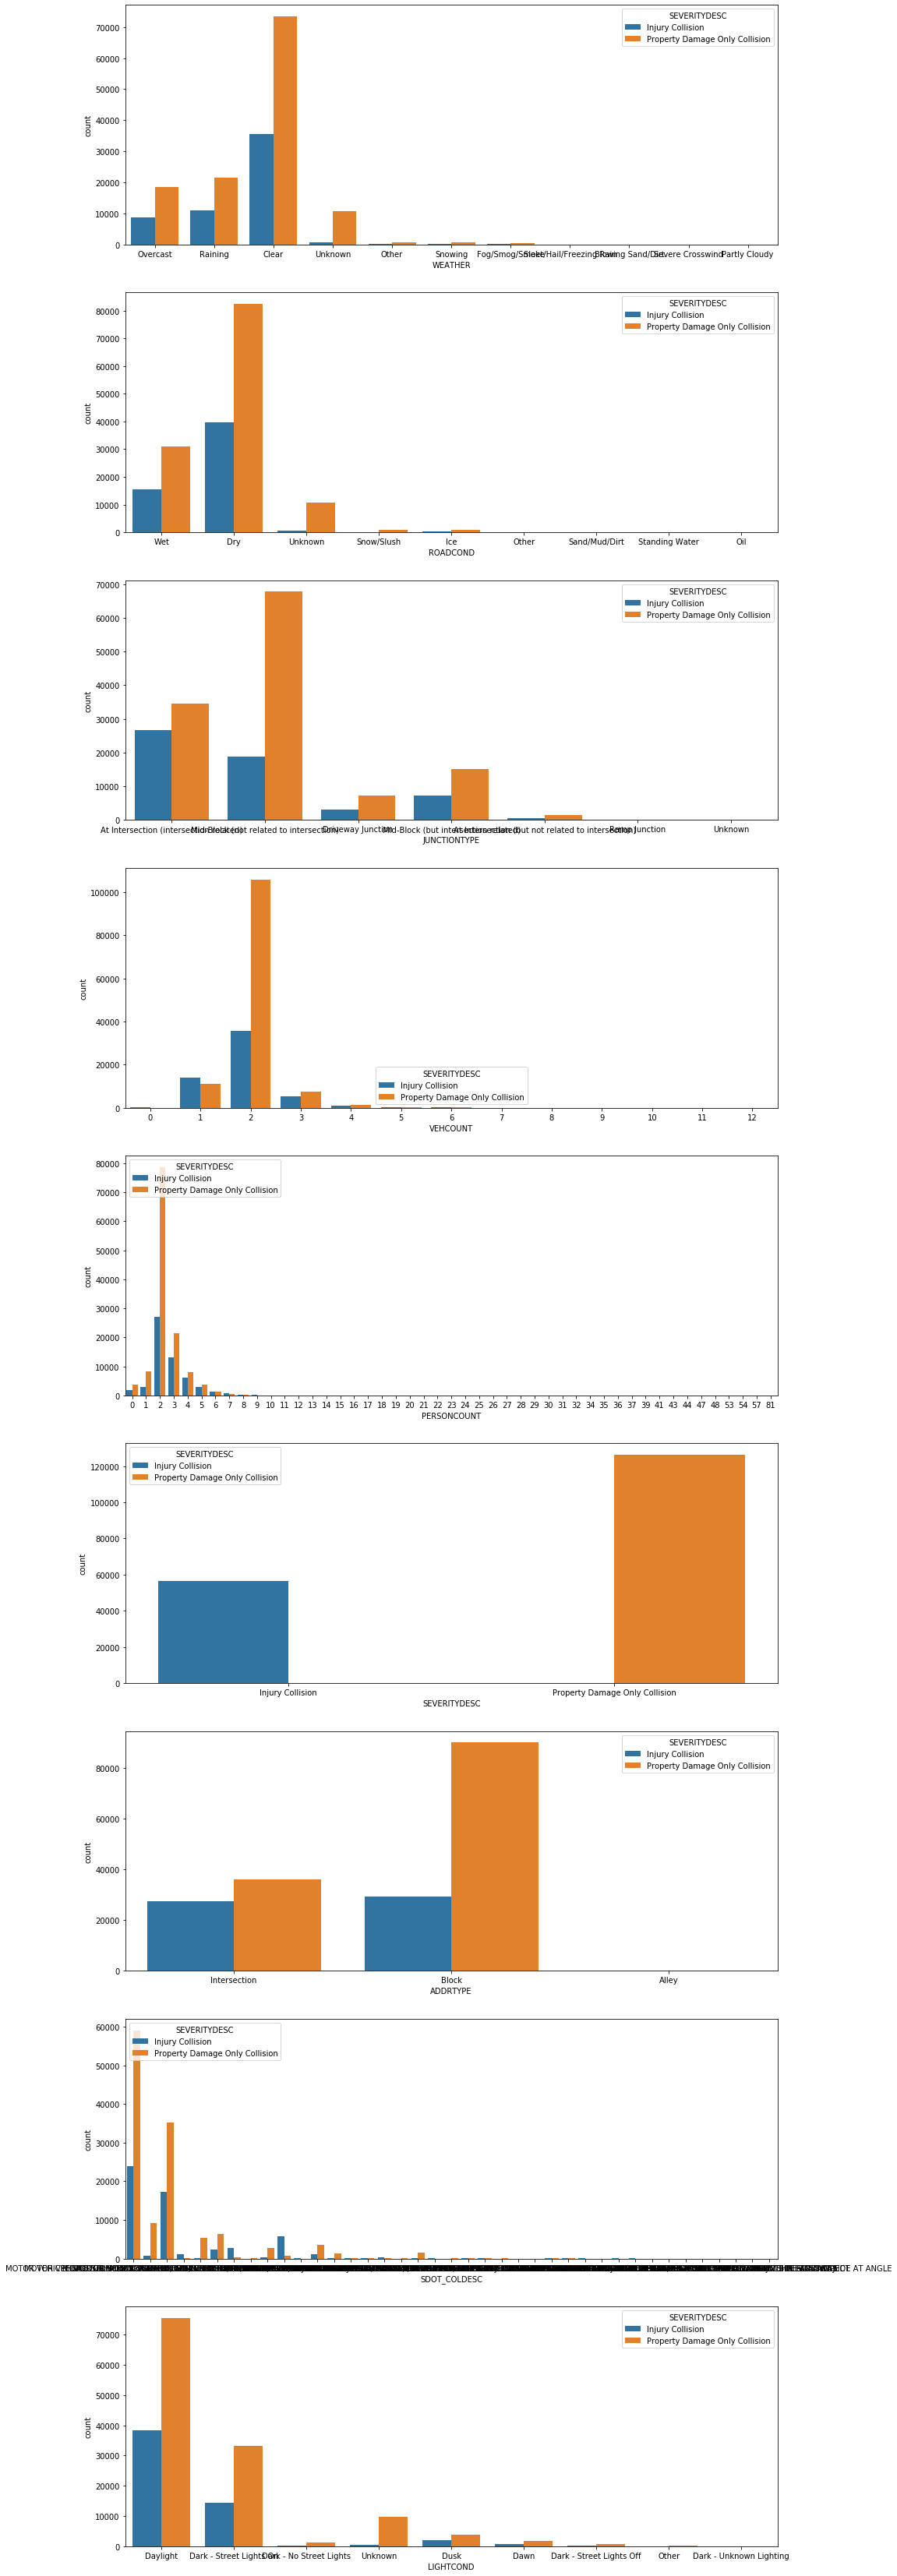

In [83]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#plot of Input variables w.r.t Target variable "SEVERITYDESC"
plt.figure(figsize=(15,60))
for i,col in enumerate(df,1):
    plt.subplot(9,1,i)
    sns.countplot(df[col],hue=df["SEVERITYDESC"])

In [88]:
#checking the data types of featutres
df.dtypes

WEATHER         object
ROADCOND        object
JUNCTIONTYPE    object
VEHCOUNT         int64
PERSONCOUNT      int64
SEVERITYDESC    object
ADDRTYPE        object
SDOT_COLDESC    object
LIGHTCOND       object
dtype: object

In [90]:
Feature=pd.get_dummies(df[['WEATHER','ROADCOND','JUNCTIONTYPE','VEHCOUNT','PERSONCOUNT','ADDRTYPE', 'SDOT_COLDESC','LIGHTCOND']])

Feature.head()

,VEHCOUNT,PERSONCOUNT,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,...,SDOT_COLDESC_PEDALCYCLIST STRUCK PEDESTRIAN,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
x=Feature
y=df['SEVERITYDESC'].values

In [95]:
print("x shape :",x.shape)
print("y shape :", y.shape)

x shape : (182914, 80)
y shape : (182914,)


## Model Development and Evaluation

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=88)
print('train set:', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set: (146331, 80) (146331,)
test set : (36583, 80) (36583,)


## Machine learning Model

### Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestClassifier

#Modelling
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
#Prediction
y_pred=model.predict(x_test)

print(y_test[0:5])
print(y_pred[0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']


In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


# Accuracy Score
ac=accuracy_score(y_test,y_pred)*100
#Jaccard similarity score
jc=jaccard_similarity_score(y_test, y_pred)*100
#f1 score
fs=f1_score(y_test, y_pred, average='weighted')*100

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [117]:
list_a=[ac,jc,fs]
list_a

[74.5838230872263, 74.5838230872263, 70.81225587190274]

In [129]:
scores= {"accuracy score": ac,"jaccard similarity score": jc,"f1 score": fs}
df = pd.DataFrame(scores,index=['Random Forest'])
df

,accuracy score,jaccard similarity score,f1 score
Random Forest,74.583823,74.583823,70.812256
